In [33]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import math
from skimage.draw import line

In [34]:
gridPath = 'Map.jpg'
myMap = mpimg.imread(gridPath)

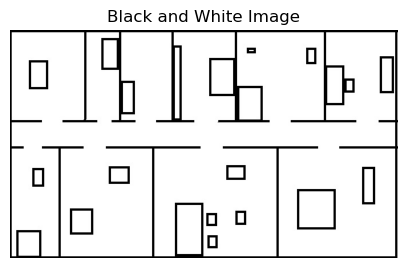

In [35]:
plt.figure(figsize=(5, 5))
plt.imshow(myMap, cmap='gray')
plt.axis('off')  # Hide axis values
plt.title('Black and White Image')
plt.show()

In [36]:
print (myMap.shape[0], myMap.shape[1])

400 680


In [37]:
def insertRobot(x, y, theta):

    # If robot position out of bounds, return
    if x < 0 or y < 0 or x >= myMap.shape[0] or y >= myMap.shape[1]:
        print("Position out of bounds!")
        return myMap
    

    newMap = np.copy(myMap)
    
    
    rays = []

    # Iterate for each ray
    for i in range(-125, 126, 2):

        # Get new x and y
        newX = int(x + (1200/4) * math.cos(((i + theta) * math.pi / 180) ))
        newY = int(y + (1200/4) * math.sin(((i + theta) * math.pi / 180) ))

        # If new x or y out of bounds, fix it
        if newX < 0:
            newX = 0

        if newX >= myMap.shape[0]:
            newX = myMap.shape[0] - 1

        if newY < 0:
            newY = 0

        if newY >= myMap.shape[1]:
            newY = myMap.shape[1] - 1

        ray = 0    
        if 0 <= newX < myMap.shape[0] and 0 <= newY < myMap.shape[1]:

            # Draw the ray line
            rr, cc = line(x, y, newX, newY)
            for j in range(len(rr)):
                if 0 <= rr[j] < myMap.shape[0] and 0 <= cc[j] < myMap.shape[1]:
                    if (myMap[rr[j], cc[j], :] == 0).all():  # Check if it encounters a black pixel
                        break  # Stop drawing the line if a black pixel is encountered
              
                    ray += 4

                    # Set color of drawn line to green
                    newMap[rr[j], cc[j], 0] = 0    
                    newMap[rr[j], cc[j], 1] = 255  
                    newMap[rr[j], cc[j], 2] = 0    

        rays.append(ray)
    


    # Set robot color to red
    newMap[x, y, 0] = 255  
    newMap[x, y, 1] = 0    
    newMap[x, y, 2] = 0    

    # Set robot body to red
    newMap[x - 5:x + 5, y - 5:y + 5, 0] = 255  
    newMap[x - 5:x + 5, y - 5:y + 5, 1] = 0  
    newMap[x - 5:x + 5, y - 5:y + 5, 2] = 0  


    return newMap, rays

In [38]:
# Get the rays when robot position in the center
myMap, rays = insertRobot(myMap.shape[0] // 2, myMap.shape[1] // 2, 90)

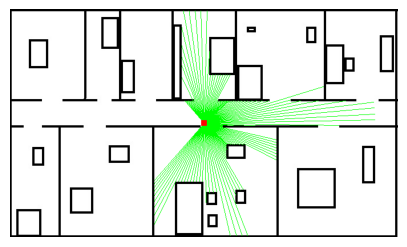

In [39]:
plt.figure(figsize=(5, 5))
plt.imshow(myMap)
plt.axis('off')  # Hide axis values
plt.show()

In [40]:
print(rays)

[404, 428, 452, 480, 512, 552, 592, 648, 712, 412, 412, 412, 412, 412, 412, 412, 412, 412, 560, 492, 488, 484, 792, 792, 792, 792, 508, 468, 472, 468, 248, 228, 212, 200, 192, 188, 172, 164, 164, 156, 160, 164, 172, 188, 200, 216, 232, 252, 276, 508, 508, 508, 508, 508, 508, 508, 508, 132, 132, 132, 208, 360, 948, 1200, 1200, 1196, 1192, 996, 804, 680, 608, 840, 456, 412, 372, 340, 308, 284, 264, 244, 224, 212, 196, 184, 176, 168, 164, 160, 160, 160, 160, 160, 160, 160, 160, 156, 168, 344, 344, 344, 344, 344, 344, 344, 344, 340, 508, 792, 792, 792, 792, 792, 676, 548, 468, 408, 168, 324, 160, 160, 160, 160, 160, 160, 160, 160]
